
### <center>Procesamiento Digital de Señales de Audio</center>
#### <center>Instituto de Ingeniería Eléctrica - UdelaR</center>
# Hoja de Ejercicios 1 - Curso 2022
## Introducción al procesamiento de audio.
### Procesamiento de audio en el dominio del tiempo - Percepción auditiva.

## Pautas para el práctico
 - La realización del presente trabajo es individual.
 - Se espera la entrega de un PDF escrito en $\LaTeX$ o similar. El mismo tendrá:
     - Máximo de 12 páginas
     - Máximo de 2500 palabras
 - También se espera la entrega del código escrito, en scripts Python o en este mismo Jupyter Notebook.
 - La corrección del práctico se hará sobre lo entregado en el PDF, pero podremos apoyarnos en el razonamiento y comprensión demostrado en el código escrito. Recomendamos escribir el código de forma prolija para facilitar la comprensión presente y futura tanto de nosotros como de ustedes mismxs.


**Nombre de el/la estudiante:** Julieta Umpierrez

### Como correr este notebook

Es posible descargarlo y correrlo localmente en su computadora

Tambien pueden correrlo en Google Colab usando el siguiente link.

<table align="center">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/mrocamora/audio-dsp/blob/main/practicos/AudioDSP_Practico_1.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Correr en Google Colab</a>
  </td>
</table>

In [ ]:
# Al correr esta celda, se podrá acceder a archivos
# y carpetas en su cuenta de google drive.
# Puede ver la estructura de carpetas apretando en
# el icono de carpeta de la barra lateral izquierda.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Ejercicio 1
**Digitalización. Sampling, aliasing. Cuantización. Dithering.**

Este ejercicio tiene como objetivo estudiar el muestreo y la cuantización de señales de audio.

### Parte 1 - Sampling / Aliasing

1. Abrir el archivo *tones.wav* (muestreado a $44100Hz$), que contiene un tono de $1760Hz$ seguido de otro tono de $7040Hz$. Se sugiere utilizar las bibliotecas *scikits.audiolab* o [scipy.io](https://docs.scipy.org/doc/scipy/reference/io.html). Re-muestrear esta señal a $22050Hz$ y a $11025Hz$. Realizarlo de dos formas: descartando una de cada dos muestras y utilizando la función *decimate* de la biblioteca [scipy.signal](https://docs.scipy.org/doc/scipy/reference/signal.html).  Estudiar los resultados, escuchando los archivos de audio obtenidos y mediante espectrogramas. Se recomienda utilizar la función *specgram* de *matplotlib* o *spectrogram* de *scipy*.

1. Repetir para el archivo *chirp.wav*. Comentar los resultados.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import io, signal
from scipy.io.wavfile import read
from IPython.display import Audio

# Ejemplo de abrir y escuchar un archivo de audio
# deben adaptar el path al directorio donde se
# encuentran las pistas en su Drive.
sr, data = io.wavfile.read('/content/drive/MyDrive/Colab Notebooks/AudioDSP_Files/tones.wav')
Audio(data, rate=sr)



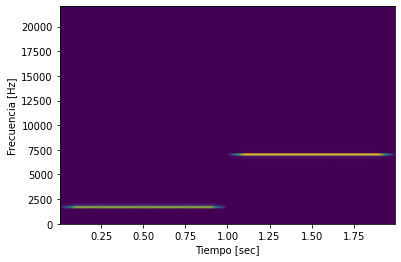

In [ ]:
#Spectrograma original
f, t, Sxx = signal.spectrogram(data, fs = sr)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frecuencia [Hz]')
plt.xlabel('Tiempo [sec]')
plt.show()

In [ ]:
#Descartando una de cada dos muestras equivale a Fs = 22050Hz
Audio(data[::2], rate=sr/2)

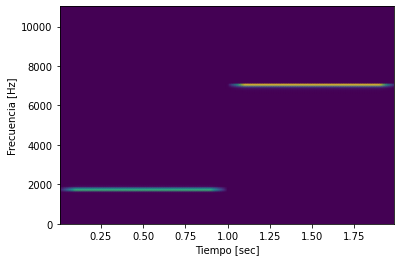

In [ ]:
#Spectrogram muestreado cada dos
f1, t1, Sxx1 = signal.spectrogram(data[::2], fs = sr/2)
plt.pcolormesh(t1, f1, Sxx1, shading='gouraud')
plt.ylabel('Frecuencia [Hz]')
plt.xlabel('Tiempo [sec]')
plt.show()

In [ ]:
#Descartando una de cada cuatro muestras equivale a Fs = 11025Hz
Audio(data[::4], rate=sr/4)

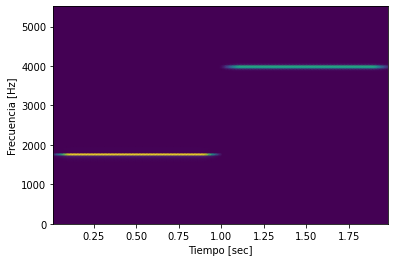

In [ ]:
#Spectrogram muestreado cada 4
f4, t4, Sxx4 = signal.spectrogram(data[::4], fs = sr/4)
plt.pcolormesh(t4, f4, Sxx4, shading='gouraud')
plt.ylabel('Frecuencia [Hz]')
plt.xlabel('Tiempo [sec]')
plt.show()

In [ ]:
#Aplicando la funcion decimate de scipy signal a Fs = 22050Hz
tone_downsampled = signal.decimate(data,2)
Audio(tone_downsampled, rate = sr/2)

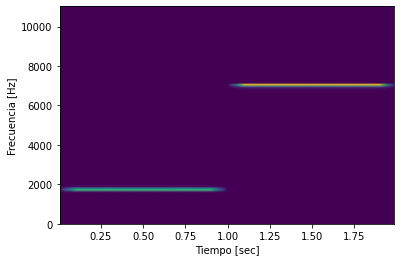

In [ ]:
#Spectrogram muestreado cada 2
f5, t5, Sxx5 = signal.spectrogram(tone_downsampled, fs = sr/2)
plt.pcolormesh(t5, f5, Sxx5, shading='gouraud')
plt.ylabel('Frecuencia [Hz]')
plt.xlabel('Tiempo [sec]')
plt.show()

In [ ]:
#Aplicando la funcion decimate de scipy signal a Fs = 11025Hz
tone_downsampled2 = signal.decimate(data,4)
Audio(tone_downsampled2, rate = sr/4)

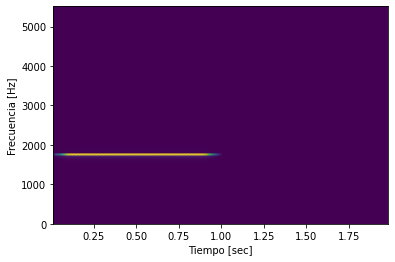

In [ ]:
#Spectrogram muestreado cada 4
f6, t6, Sxx6 = signal.spectrogram(tone_downsampled2, fs = sr/4)
plt.pcolormesh(t6, f6, Sxx6, shading='gouraud')
plt.ylabel('Frecuencia [Hz]')
plt.xlabel('Tiempo [sec]')
plt.show()

In [ ]:
sr2, data2 = io.wavfile.read('/content/drive/MyDrive/Colab Notebooks/AudioDSP_Files/chirp.wav')
Audio(data2, rate=sr2)

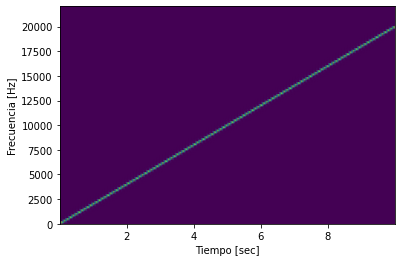

In [ ]:
#Original
f10, t10, Sxx10 = signal.spectrogram(data2, fs = sr2)
plt.pcolormesh(t10, f10, Sxx10, shading='gouraud')
plt.ylabel('Frecuencia [Hz]')
plt.xlabel('Tiempo [sec]')
plt.show()

In [ ]:
#Descartando una de cada dos muestras equivale a Fs = 22050Hz
Audio(data2[::2], rate=sr2/2)

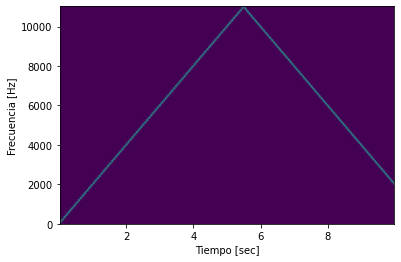

In [ ]:
f11, t11, Sxx11 = signal.spectrogram(data2[::2], fs = sr2/2)
plt.pcolormesh(t11, f11, Sxx11, shading='gouraud')
plt.ylabel('Frecuencia [Hz]')
plt.xlabel('Tiempo [sec]')
plt.show()

In [ ]:
#Descartando una de cada cuatro muestras equivale a Fs = 11025Hz
Audio(data2[::4], rate=sr2/4)

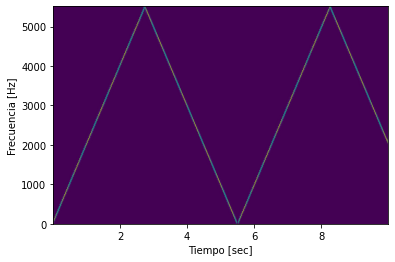

In [ ]:
f12, t12, Sxx12 = signal.spectrogram(data2[::4], fs = sr2/4)
plt.pcolormesh(t12, f12, Sxx12, shading='gouraud')
plt.ylabel('Frecuencia [Hz]')
plt.xlabel('Tiempo [sec]')
plt.show()

In [ ]:
tone_downsampled3 = signal.decimate(data2,2)
Audio(tone_downsampled3, rate = sr2/2)

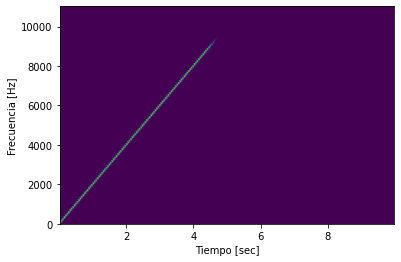

In [ ]:
f12, t12, Sxx12 = signal.spectrogram(tone_downsampled3, fs = sr/2)
plt.pcolormesh(t12, f12, Sxx12, shading='gouraud')
plt.ylabel('Frecuencia [Hz]')
plt.xlabel('Tiempo [sec]')
plt.show()

In [ ]:
tone_downsampled4 = signal.decimate(data2,4)
Audio(tone_downsampled4, rate = sr2/4)

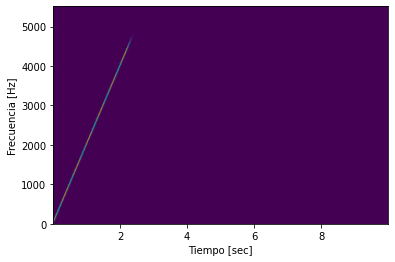

In [ ]:
f13, t13, Sxx13 = signal.spectrogram(tone_downsampled4, fs = sr/4)
plt.pcolormesh(t13, f13, Sxx13, shading='gouraud')
plt.ylabel('Frecuencia [Hz]')
plt.xlabel('Tiempo [sec]')
plt.show()

### Parte 2 - Quantization / Dithering

1. Asumiendo el error de cuantización uniforme y con distribución $\mathcal{U}(-\frac{Q}{2},\frac{Q}{2})$, deduzca la expresión del *signal-to-error ratio* para un sistema de $n$ bits de largo de palabra. ¿Cuántos decibeles se reduce el error de cuantización al aumentar $1$ bit el largo de palabra?
1. Calcular la potencia del ruido de cuantización al agregar dithering en el sistema. Considerar dithering con las distribuciones de probabilidad de la figura 2.
---

<img src="https://drive.google.com/uc?id=1eLJhdlVPEl2r5tT2PkBeLCRcto5cWmbJ" alt="FIG 1">

`FIG 1: Señal sinusoidal de frecuencia \unit[2000]{Hz} y amplitud $2$.`

---

---
<img src="https://drive.google.com/uc?id=1RjvPvWYthAp4-new0PYVFeJn8eCvueSm" alt="FIG 2">

`FIG 2: Distribuciones de probabilidad de los tipos de dithering. La distribución gaussiana es`
$\mathcal{N}(0, \frac{Q^2}{4})$

---

3. Se desea analizar el efecto de la cuantización y el uso de dithering para una señal de baja amplitud. Se utilizará una señal sinusoidal de frecuencia $500Hz$ y amplitud $2$, muestreada a $f_s=44100Hz$ (figura 1). Para simular que esta señal tiene baja amplitud con respecto al rango de la cuantización, considerar el paso de cuantización igual a $1$.

	Se pide:
	1. Generar la señal sinusoidal (unos pocos segundos).
	1. Sumar a la señal tres tipos de dithering; uniforme, triangular y gaussiano, utilizando las distribuciones de probabilidad de la figura 2.
	1. Cuantizar la señal sin dithering, y las señales con los distintos tipos de dithering.
	1. Calcular la potencia del error de cuantización y graficar el espectro de la señal cuantizada en cada caso.
	1. Analizar los resultados de manera gráfica y perceptual (auditiva). Comparar.


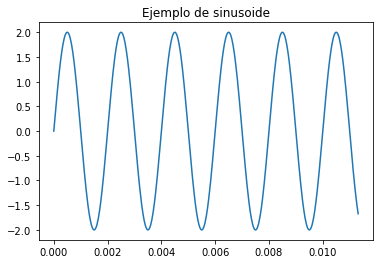

In [ ]:
# parametros
amplitud = 2
frecuencia = 500

# vector de tiempos
t = np.arange(0, 3, 1/44100)
# otra opcion
t = np.linspace(0, 3, 44100*(3-0))
sinusoide = amplitud * np.sin(2*np.pi * frecuencia * t)

# grafica de parte de la sinusoide
plt.plot(t[:500], sinusoide[:500])
plt.title("Ejemplo de sinusoide")
plt.show()

# reproducir audio
Audio(sinusoide, rate=44100)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


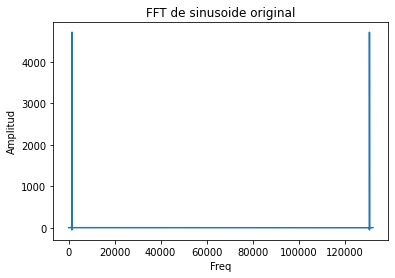

In [ ]:
fft_sin = np.fft.fft(sinusoide)
Freqsin = np.arange(0, len(fft_sin))
plt.figure()
plt.plot(Freqsin, fft_sin)
plt.xlabel('Freq')
plt.ylabel('Amplitud')
plt.title('FFT de sinusoide original')
plt.show()

In [ ]:
#Generador
semilla = 42
rng = np.random.default_rng(semilla)
#np.random.seed(semilla)

In [ ]:
Q = 1
def dither(tipo,signal1, rng,Q):
  signal2 = signal1.copy()
  if tipo == 'triangular':
    for i in range(132300):
      signal2[i] = signal1[i] + rng.triangular(-Q,0,Q)
  if tipo == 'rectangular':
    for i in range(132300):
      signal2[i] = signal1[i] + rng.uniform(-Q/2,Q/2)
  if tipo == 'gaussiana':
    for i in range(132300):
      signal2[i] = signal1[i] + rng.normal(loc = 0,scale = np.sqrt((Q*Q)/4))
  return signal2

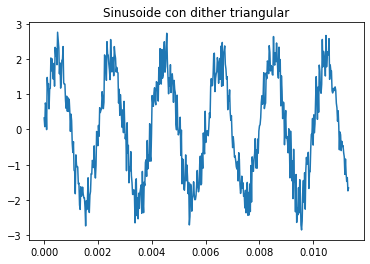

In [ ]:
#Triangular
dither_t = dither('triangular',sinusoide,rng,Q)
plt.plot(t[:500], dither_t[:500])
plt.title("Sinusoide con dither triangular")
plt.show()

In [ ]:
Audio(dither_t, rate=44100)

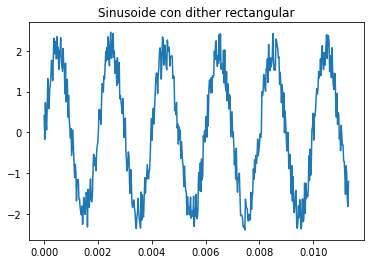

In [ ]:
#Rectangular
dither_r = dither('rectangular',sinusoide,rng,Q)
plt.plot(t[:500], dither_r[:500])
plt.title("Sinusoide con dither rectangular")
plt.show()

In [ ]:
Audio(dither_r, rate=44100)

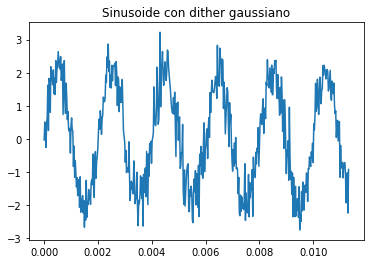

In [ ]:
#Gaussiano
dither_g = dither('gaussiana',sinusoide,rng,Q)
plt.plot(t[:500], dither_g[:500])
plt.title("Sinusoide con dither gaussiano")
plt.show()

In [ ]:
Audio(dither_g, rate=44100)

In [ ]:
#Cuantizacion
#https://stackoverflow.com/questions/38152081/how-do-you-quantize-a-simple-input-using-python
def cuantizador(Q,signal3):
  signal = signal3.copy()
  for i in range(132300):
    signal[i] = np.round(signal3[i]/Q)
    if signal[i]>2:
      signal[i] = 2
    if signal[i]<-2:
      signal[i] = -2
  return signal

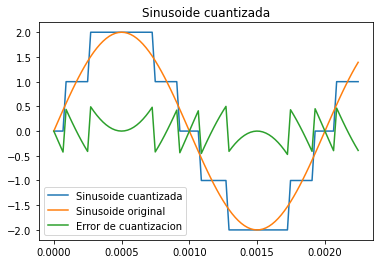

In [ ]:
s_cuant = cuantizador(Q,sinusoide)
error = s_cuant-sinusoide
plt.plot(t[:100], s_cuant[:100])
plt.plot(t[:100], sinusoide[:100])
plt.plot(t[:100],error[:100])
plt.title("Sinusoide cuantizada")
plt.legend(['Sinusoide cuantizada','Sinusoide original','Error de cuantizacion'])
plt.show()

In [ ]:
def pot_error(s_cuantizada, s_original):
  c_muestras = len(s_original)
  s = 0
  for i in range(c_muestras):
    s = s + (s_cuantizada[i]-s_original[i])**2
  s = s/c_muestras
  return s


In [ ]:
error_sin = pot_error(s_cuant,sinusoide)
print(error_sin)

0.06950359149644926


In [ ]:
Audio(s_cuant, rate=44100)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


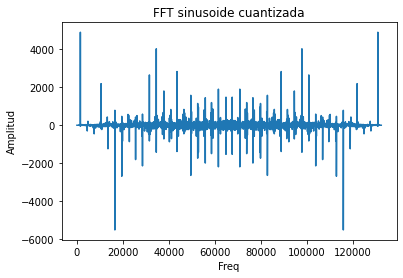

In [ ]:
fft_s = np.fft.fft(s_cuant)
Freq = np.arange(0, len(fft_s))
plt.figure()
plt.plot(Freq, fft_s)
plt.xlabel('Freq')
plt.ylabel('Amplitud')
plt.title('FFT sinusoide cuantizada')
plt.show()

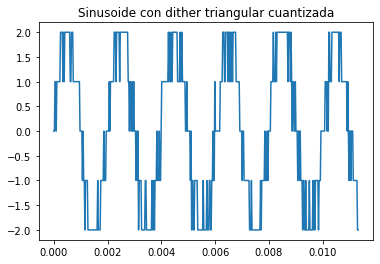

In [ ]:
#Sinusoide con dither triangular cuantizada
t_cuant = cuantizador(Q, dither_t)
plt.plot(t[:500], t_cuant[:500])
plt.title("Sinusoide con dither triangular cuantizada")
plt.show()

In [ ]:
error_tri = pot_error(t_cuant,sinusoide)
print(error_tri)

0.2140354559576392


In [ ]:
Audio(t_cuant, rate=44100)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


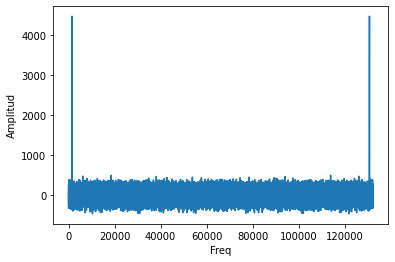

In [ ]:
fft_t = np.fft.fft(t_cuant)
Freq = np.arange(0, len(fft_t))
plt.figure()
plt.plot(Freq, fft_t)
plt.xlabel('Freq')
plt.ylabel('Amplitud')
plt.show()

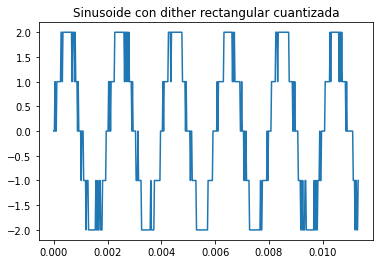

In [ ]:
#Sinusoide con dither rectangular cuantizada
r_cuant = cuantizador(Q, dither_r)
plt.plot(t[:500], r_cuant[:500])
plt.title("Sinusoide con dither rectangular cuantizada")
plt.show()

In [ ]:
error_rect = pot_error(r_cuant,sinusoide)
print(error_rect)

0.14489764219310927


In [ ]:
Audio(r_cuant, rate=44100)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


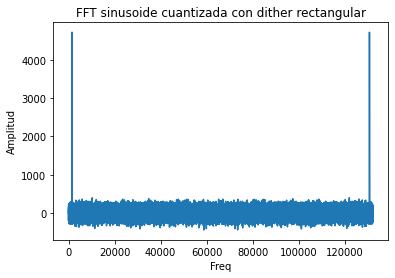

In [ ]:
fft_r = np.fft.fft(r_cuant)
Freq = np.arange(0, len(fft_r))
plt.figure()
plt.plot(Freq, fft_r)
plt.xlabel('Freq')
plt.ylabel('Amplitud')
plt.title('FFT sinusoide cuantizada con dither rectangular')
plt.show()

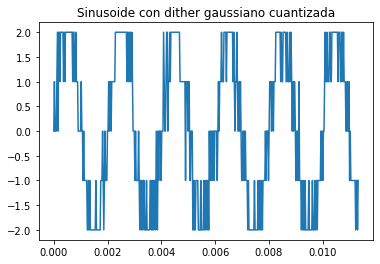

In [ ]:
#Sinusoide con dither gaussiano cuantizada
g_cuant = cuantizador(Q, dither_g)
plt.plot(t[:500], g_cuant[:500])
plt.title("Sinusoide con dither gaussiano cuantizada")
plt.show()

In [ ]:
error_g = pot_error(g_cuant,sinusoide)
print(error_g)

0.2708276650296179


In [ ]:
Audio(g_cuant, rate=44100)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


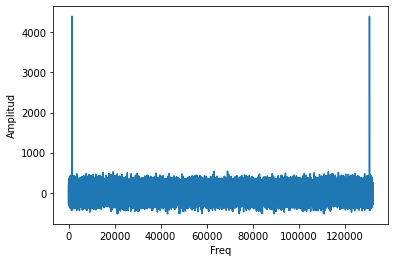

In [ ]:
fft_g = np.fft.fft(g_cuant)
Freq = np.arange(0, len(fft_g))
plt.figure()
plt.plot(Freq, fft_g)
plt.xlabel('Freq')
plt.ylabel('Amplitud')
plt.show()

## Ejercicio 2
**Short-time average energy, magnitude and zero-crossing rate.**

En este ejercicio se calculan características en tiempo corto de una señal de audio; en particular, energía, magnitud y tasa de cruces por cero.

### Parte 1

La energía y la magnitud en tiempo corto de una señal $x[n]$, $E_n$ y $M_n$ respectivamente, se definen como:

\begin{equation*}
\begin{array}{rcl}
	E_n & = & \displaystyle\sum_{m=-\infty}^{\infty}x^2[m]w[n-m] \\
	M_n & = & \displaystyle\sum_{m=-\infty}^{\infty}|x[m]|w[n-m]
\end{array}
\end{equation*}

donde $w[n]$ es una ventana de análisis temporal. Se pide:

1. Para la ventana $w_a[n]$, encontrar las expresiones en recurrencia para calcular $E_n$ y $M_n$ en función de $E_{n-1}$ y $M_{n-1}$ respectivamente.

	\begin{equation*}
		w_a[n]=
			\begin{cases}
				a^n, & n \geq 0 \\
				0, & n < 0.
		\end{cases}
	\end{equation*}

2. Para la ventana rectangular $w_R[n]$, escribir funciones que implementen el cálculo de $E_n$ y $M_n$.

	\begin{equation*}
		w_R[n]=
			\begin{cases}
				1, & 0 \leq n \leq N-1 \\
				0, & \text{en otro caso}.
			\end{cases}
	\end{equation*}

3. Utilizando estas funciones, calcular y graficar $E_n$ y $M_n$ para la señal de audio del archivo _voice.wav_. ¿Es posible determinar el inicio y final de las palabras aisladas utilizando estas medidas?

In [ ]:
def Energia(grabacion, N):
  largo = grabacion.shape[0]
  E = np.zeros(largo)
  for n in range(largo):
    aux = 0
    for m in range(n-N+1,n):
      aux = aux + grabacion[m]**2
    E[n] = aux
  return E

In [ ]:
def Magnitud(grabacion,N):
  largo = grabacion.shape[0]
  M = np.zeros(largo)
  for n in range(largo):
    aux = 0
    for m in range(n-N+1,n):
      aux = aux + np.abs(grabacion[m])
    M[n] = aux
  return M

In [ ]:
sr_v, voice = io.wavfile.read('/content/drive/MyDrive/Colab Notebooks/AudioDSP_Files/voice.wav')
Audio(voice, rate=sr_v)

In [ ]:
time = np.linspace(0, voice.shape[0] / sr_v, voice.shape[0])

Text(0.5, 0, 'tiempo')

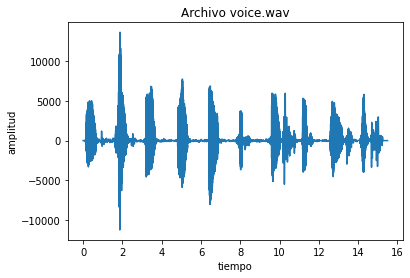

In [ ]:
plt.plot(time,voice)
plt.title('Archivo voice.wav')
plt.ylabel('amplitud')
plt.xlabel('tiempo')

In [ ]:
sr_v

16000

Se usa 640 pues es sr_v*40ms

In [ ]:
energia = Energia(voice,640)

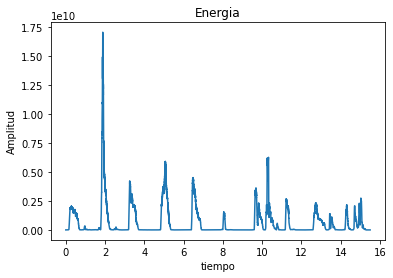

In [ ]:
plt.plot(time, energia)
plt.title("Energia")
plt.xlabel('tiempo')
plt.ylabel('Amplitud')
plt.show()

In [ ]:
magnitud  = Magnitud(voice, 640)

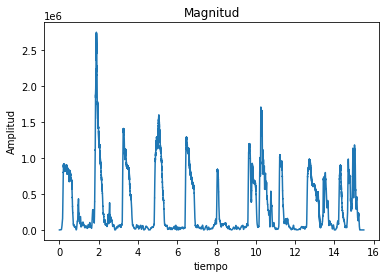

In [ ]:
plt.plot(time, magnitud)
plt.title("Magnitud")
plt.xlabel('tiempo')
plt.ylabel('Amplitud')
plt.show()

### Parte 2

La tasa de cruces por cero es una forma simple de estimar el contenido espectral de una señal, sobre todo para señales de banda angosta. Matemáticamente puede definirse como

\begin{equation*}
	Z_n = \displaystyle\sum_{m=-\infty}^{\infty}|\text{sign}(x[m])-\text{sign}(x[m-1])|\ w[n-m]
\end{equation*}

donde \;
$\text{sign}(x[m]) = \begin{cases} 1, & x[m]\geq0 \\ -1, & x[m]<0. \end{cases}$ \;
y \;
$w[n] = \begin{cases} \frac{1}{2N}, & 0\leq n\leq N-1 \\ 0, & \text{en otro caso} \end{cases}$

Se pide:
1. Demostrar que $Z_n$ puede expresarse de forma recursiva como

  \begin{equation*}
        Z_n = Z_{n-1} + \frac{1}{2N}\left\{ |\text{sign}(x[n]) - \text{sign}(x[n-1])| - |\text{sign}(x[n-N]) - \text{sign}(x[n-N-1])| \right\}.
  \end{equation*}

1. Escribir una función que calcule la tasa de cruces por cero para $N$ muestras de una señal.

3. Calcular y graficar la tasa de cruces por cero para la señal de audio del archivo *voice.wav*, cada $10ms$. ¿Esta medida aporta información para encontrar los inicios y finales de las palabras?

In [ ]:
def tasa_cruces_por_cero(grabacion,N):
  largo = grabacion.shape[0]
  T = np.zeros(largo)
  for n in range(largo):
    aux = 0
    for m in range(n-N+1,n):
      x1 = np.sign(grabacion[m])
      x2 = np.sign(grabacion[m-1])
    aux = aux + np.abs(x1-x2)
    T[n] = aux/(2*N)
  return T

In [ ]:
tasa =  tasa_cruces_por_cero(voice, 160)

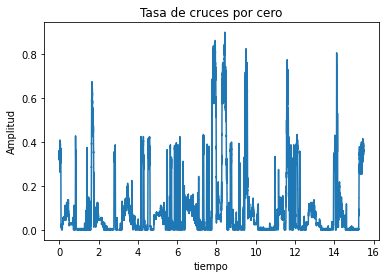

In [ ]:
plt.plot(time,tasa)
plt.title("Tasa de cruces por cero")
plt.xlabel('tiempo')
plt.ylabel('Amplitud')
plt.show()

### Parte 3

El problema de encontrar el inicio y final de palabras es importante en muchas aplicaciones de procesamiento de señales de voz. Una manera simple de abordar este problema es utilizando la energía en tiempo corto y la tasa de cruces por cero en tiempo corto.

Se pide:

1. Implementar un algoritmo que encuentre automáticamente el inicio y final de las palabras, utilizando las funciones escritas en las partes anteriores (energía y tasa de cruces por cero).
1. Probar el algoritmo con las señales de los archivos *voice.wav*, *voice2.wav* y *fox.wav*.
1. Comentar los resultados obtenidos, incluyendo las posibles limitantes del abordaje.

In [ ]:
def detector(x,sr_x):
  largo  = x.shape[0]
  resultado = np.zeros(largo)
  umbral_e = 0.2e10
  umbral_t = 0.6
  energia = Energia(x,int(sr_x*0.04))
  tasa = tasa_cruces_por_cero(x,int(sr_x*0.01))
  for n in range(largo):
    if energia[n]>umbral_e:
      resultado[n] = np.max(x)
    elif tasa[n]>umbral_t:
      resultado[n] = np.max(x)
  return resultado

In [ ]:
print(0.20e10)

2000000000.0


In [ ]:
voice_d = detector(voice,sr_v)
print(voice_d)

[0. 0. 0. ... 0. 0. 0.]


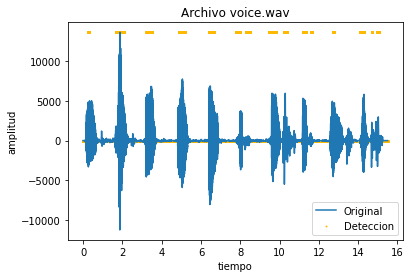

In [ ]:
plt.plot(time,voice)
plt.scatter(time,voice_d, c = '#fcba03',s = 0.9)
plt.title('Archivo voice.wav')
plt.ylabel('amplitud')
plt.xlabel('tiempo')
plt.legend(['Original','Deteccion'])

In [ ]:
sr_v2, voice2 = io.wavfile.read('/content/drive/MyDrive/Colab Notebooks/AudioDSP_Files/voice2.wav')
Audio(voice2, rate=sr_v2)

In [ ]:
voice_d2 = detector(voice2,sr_v2)

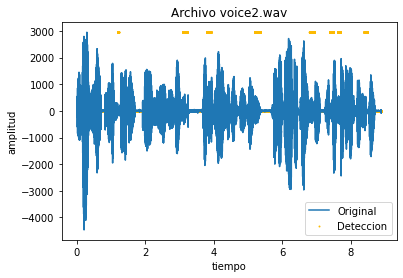

In [ ]:
time2 = np.linspace(0, voice2.shape[0] / sr_v2, voice2.shape[0])
plt.plot(time2,voice2)
plt.scatter(time2,voice_d2, c = '#fcba03',s = 0.9)
plt.title('Archivo voice2.wav')
plt.ylabel('amplitud')
plt.xlabel('tiempo')
plt.legend(['Original','Deteccion'])

In [ ]:
sr_f, fox = io.wavfile.read('/content/drive/MyDrive/Colab Notebooks/AudioDSP_Files/fox.wav')
Audio(fox, rate=sr_f)

In [ ]:
fox_d = detector(fox,sr_f)

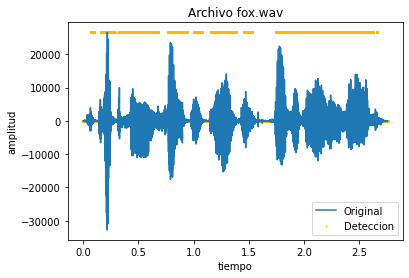

In [ ]:
timef = np.linspace(0, fox.shape[0] / sr_f, fox.shape[0])
plt.plot(timef,fox)
plt.scatter(timef,fox_d, c = '#fcba03',s = 0.9)
plt.title('Archivo fox.wav')
plt.ylabel('amplitud')
plt.xlabel('tiempo')
plt.legend(['Original','Deteccion'])

## Ejercicio 3
**Short-time autocorrelation function, short-time AMDF and pitch estimation.**

En este ejercicio se presenta el cálculo de la función de autocorrelación, y su aplicación en el cálculo de la frecuencia fundamental de una señal de audio.

### Parte 1

La función de autocorrelación en tiempo corto está definida como
\begin{equation*}
	R_n[k] = \displaystyle\sum_{m=-\infty}^{\infty}x[m]w[n-m]x[m+k]w[n-k-m].
\end{equation*}

1. Demostrar que $R_n[k]$ es una función par en $k$, o sea, que $R_n[k] = R_n[-k]$.
1. Demostrar que $R_n[k]$ puede escribirse como
	\begin{equation*}
		R_n[k] = \displaystyle\sum_{m=-\infty}^{\infty}x[m]x[m-k]h_k[n-m]
	\end{equation*}
	donde $h_k[n] = w[n]w[n+k]$.

### Parte 2

Se utilizará ahora la función de autocorrelación para implementar la detección de frecuencia fundamental de señales de audio. Se sugiere el siguiente procedimiento:
1. Se toman intervalos de $30ms$ de largo, cada $10ms$ (i.e. $20ms$ de superposición).
1. Para cada intervalo:
	1. Se calculan los primeros $250$ valores de la función de autocorrelación (Se sugiere una implementación vectorial).
	1. Se busca el índice $k_f$ del primer máximo local que supere el $60\%$ del valor en cero. Si existe, hay un componente periódico suficientemente notorio, cuya frecuencia es $f = \frac{f_s}{k_f}$.
	1. Si no se encuentra ningún máximo local bajo esa condición, se asigna $f = 0$, considerándose que no hay un componente periódico relevante en ese intervalo de tiempo.
	1. Se obtiene un vector con valores de frecuencia cada $10ms$ comenzando en $t=0.015s$.

Realizar este procedimiento utilizando la señal de audio del archivo *LP-mem-6-a.wav*. Comparar los resultados con la referencia contenida en el archivo *LP-mem-6-a.txt*.



In [ ]:
win_size = 0.03
hop_size = 0.01
srLP, LP = io.wavfile.read('/content/drive/MyDrive/Colab Notebooks/AudioDSP_Files/LP-mem-6-a.wav')
Audio(LP, rate=srLP)

In [ ]:
#Varias lineas de codigo fueron extraidas del notebook audioDSP-short_time_example.ipynb realizado en clase
def estimador_f0(win_size,hop_size,x,fs,N_auto):
  # signal length in samples
  L = x.shape[0]
  # window size in samples
  win_samp = int(win_size * fs)
  # hop size in samples
  hop_samp = int(hop_size * fs)
  # number of frames to process
  num_frames = int((L - win_samp)/ hop_samp)
  # empty array for the output signal
  f = np.zeros(num_frames)
  # sampling frequency of the resulting signal
  fs_y = fs / hop_samp
  # time stamps for the resulting signal samples
  t = np.linspace(0, num_frames / fs_y, num=num_frames) + win_size / 2
  # vector de autocorrelaciones
  autocorr = np.zeros(N_auto)
  for i in range(1, num_frames):
    # frame's initial index
    ind_ini = i*hop_samp
    # frame's ending index
    ind_end = i*hop_samp + win_samp
    # signal frame
    frame = x[ind_ini:ind_end]
    n= ind_ini
    N = win_samp
    for k in range(N_auto):
      aux = 0
      lim_inf = max(n-N+1,n-N+1+k)
      lim_sup = min(n,n+k)
      for m in range(lim_inf,lim_sup):
        aux = aux + x[m]*x[m-k]
      autocorr[k] = aux
      if autocorr[k]>autocorr[0]*0.6 and k!=0:
        f[i] = fs/k
        if f[i]>1000:
          f[i] = 0
        break
  return f,t

In [ ]:
fres,tiempo_f = estimador_f0(win_size,hop_size,LP,srLP,250)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in short_scalars


Text(0.5, 0, 'Tiempo')

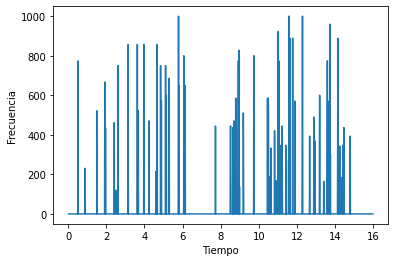

In [ ]:
plt.plot(tiempo_f,fres)
plt.ylabel('Frecuencia')
plt.xlabel('Tiempo')

In [ ]:
pro =np.genfromtxt(fname='/content/drive/MyDrive/Colab Notebooks/AudioDSP_Files/LP-mem-6-a.txt')

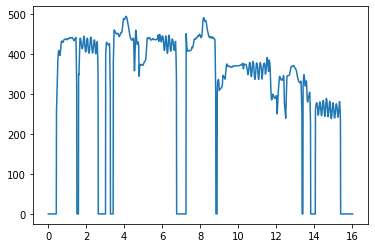

In [ ]:
plt.plot(pro[:,0],pro[:,1])

In [ ]:
#Varias lineas de codigo fueron extraidas del notebook audioDSP-short_time_example.ipynb realizado en clase
def estimador_f0(win_size,hop_size,x,fs,N_auto):
  # signal length in samples
  L = x.shape[0]
  # window size in samples
  win_samp = int(win_size * fs)
  # hop size in samples
  hop_samp = int(hop_size * fs)
  # number of frames to process
  num_frames = int((L - win_samp)/ hop_samp)
  # empty array for the output signal
  f = np.zeros(num_frames)
  # sampling frequency of the resulting signal
  fs_y = fs / hop_samp
  # time stamps for the resulting signal samples
  t = np.linspace(0, num_frames / fs_y, num=num_frames) + win_size / 2
  # vector de autocorrelaciones
  autocorr = np.zeros(N_auto)
  for i in range(1, num_frames):
    # frame's initial index
    ind_ini = i*hop_samp
    # frame's ending index
    ind_end = i*hop_samp + win_samp
    # signal frame
    frame = x[ind_ini:ind_end]
    for k in range(N_auto):
      ind_inik = ind_ini+k
      ind_endk = ind_end+k
      framek = x[ind_inik:ind_endk]
      try:
        autocorr[k]= frame@framek
      except:
        print('salio algo mal')
        pass
    indices = autocorr>autocorr[0]*0.6
    indices_true = np.where(indices)[0]
    indice_k = indices_true[0]+1
    #print(indice_k)
    if indice_k!=0:
      f[i] = fs/indice_k
    if f[i]>10000:
      f[i] = 0
  print(f)
  return f,t

In [ ]:
fres2,tiempo_f2 = estimador_f0(win_size,hop_size,LP,srLP,250)

[   0.    0.    0. ...    0.    0. 8000.]


Text(0.5, 0, 'Tiempo')

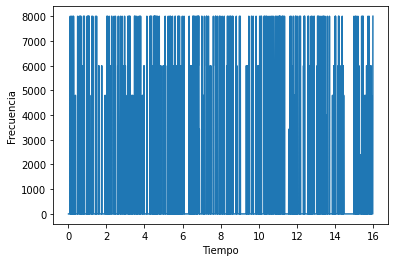

In [ ]:
plt.plot(tiempo_f2,fres2)
plt.ylabel('Frecuencia')
plt.xlabel('Tiempo')

In [ ]:
autocorr = np.array([10,20,30,1,60,100])
indices = autocorr>autocorr[0]*0.6
print(indices)
indices_true = np.where(indices)[0]
print(indices_true)
indice_k = indices_true[0]
print(indice_k)

[ True  True  True False  True  True]
[0 1 2 4 5]
0
